# EYE FOR BLIND
This notebook will be used to prepare the capstone project 'Eye for Blind'

In [1]:
#Import all the required libraries
import numpy as np
import os
#from scipy.misc import imread, imresize
from skimage import io
from skimage.transform import rescale, resize
import datetime
import os
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import random
import pandas as pd
pd.set_option("display.max_columns",None) # for displaying all columns
pd.set_option("display.max_rows",None) # for displaying all rows
pd.set_option('display.max_colwidth', -1)
import time
from IPython.display import display, Image
import seaborn as sns
import string
from PIL import Image as ImagePIL
from tqdm import tqdm
from keras.applications.inception_v3 import preprocess_input
import tensorflow as tf
import tqdm.notebook as tq




Using TensorFlow backend.


Let's read the dataset

## Data understanding
1.Import the dataset and read image & captions into two seperate variables

2.Visualise both the images & text present in the dataset

3.Create word-to-index and index-to-word mappings.

4.Create a dataframe which summarizes the image, path & captions as a dataframe

5.Visualise the top 30 occuring words in the captions

6.Create a list which contains all the captions & path


In [2]:
# Environment to decide for colab/nimblebo/local
env='nimblebox/Local'
if env=='colab':
    images='/content/drive/MyDrive/Flickr 8k dataset/Images'
    text_file='/content/drive/MyDrive/Flickr 8k dataset/captions.txt'
else:
    images='Flickr8K/Images'
    text_file='Flickr8K/captions.txt'
    
#Import the dataset and read the image into a seperate variable
all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


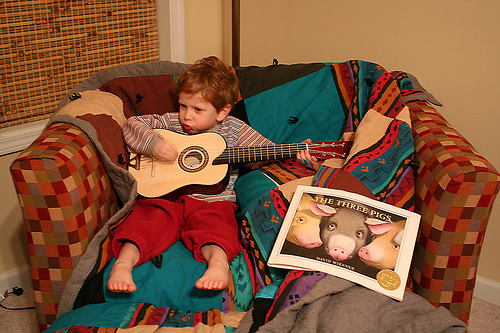

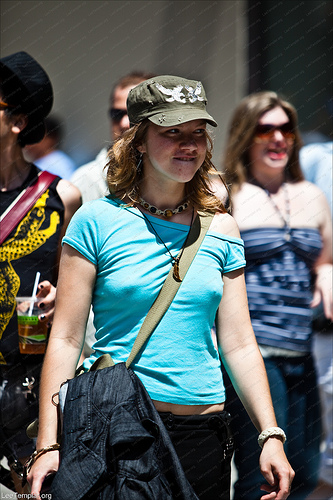

In [3]:
#Visualise both the images & text present in the dataset
for i in range(2):
    display(Image(filename=all_imgs[i],height=200,width=200))


In [4]:
#Import the dataset and read the text file into a seperate variable

def load_doc(filename):
    
    #your code here
    file = open(filename, 'r')
    text = file.read()
    file.close()
    
    return text

doc = load_doc(text_file)
print(doc[:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


Create a dataframe which summarizes the image, path & captions as a dataframe

Each image id has 5 captions associated with it therefore the total dataset should have 40455 samples.

In [5]:
all_img_id= [line.split(',')[0] for line in doc.split('\n')[1:]] #store all the image id here
all_img_vector=[images+'/'+Id for Id in all_img_id] #store all the image path here
annotations= [list(line.split(',')[1:]) for line in doc.split('\n')[1:]] #store all the captions here

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
df.head()
def Strip(data):
    for i in data:
        return str(i.strip('[]'))
    
df['Captions'] = df.Captions.apply(Strip)
df = df.dropna()
df.head()

,ID,Path,Captions
0,1000268201_693b08cb0e.jpg,Flickr8K/Images/1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1,1000268201_693b08cb0e.jpg,Flickr8K/Images/1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,Flickr8K/Images/1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,Flickr8K/Images/1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playhouse .
4,1000268201_693b08cb0e.jpg,Flickr8K/Images/1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a wooden cabin .


1000268201_693b08cb0e.jpg


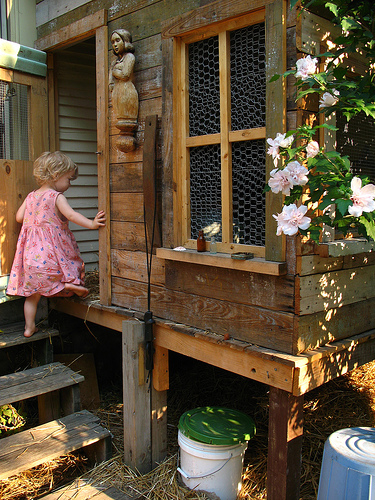

 A child in a pink dress is climbing up a set of stairs in an entry way .
 A girl going into a wooden building .                                   
 A little girl climbing into a wooden playhouse .                        
 A little girl climbing the stairs to her playhouse .                    
 A little girl in a pink dress going into a wooden cabin .               
1001773457_577c3a7d70.jpg


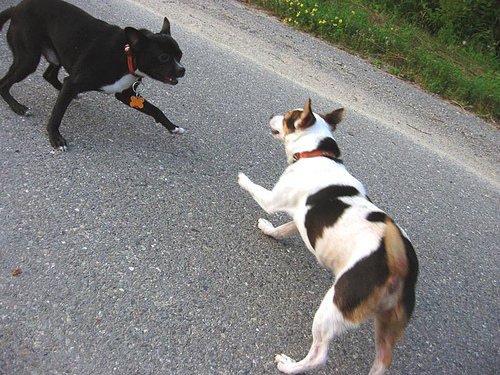

 A black dog and a spotted dog are fighting                                            
 A black dog and a tri-colored dog playing with each other on the road .               
 A black dog and a white dog with brown spots are staring at each other in the street .
 Two dogs of different breeds looking at each other on the road .                      
 Two dogs on pavement moving toward each other .                                       
1002674143_1b742ab4b8.jpg


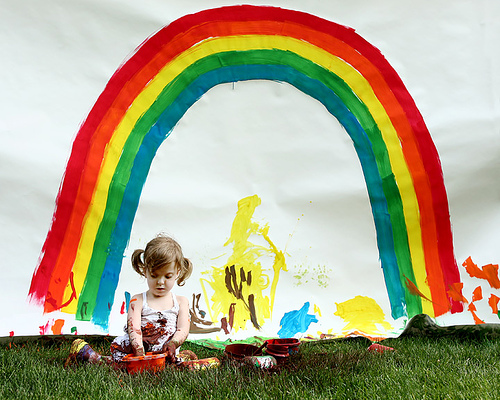

 A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .       
 A little girl is sitting in front of a large painted rainbow .                                     
 A small girl in the grass plays with fingerpaints in front of a white canvas with a rainbow on it .
 There is a girl with pigtails sitting in front of a rainbow painting .                             
 Young girl with pigtails painting outside in the grass .                                           
1003163366_44323f5815.jpg


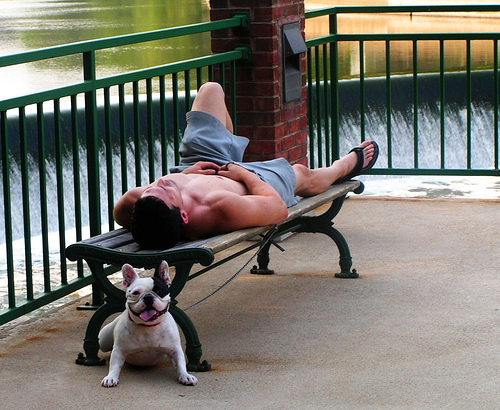

 A man lays on a bench while his dog sits by him .                                 
 A man lays on the bench to which a white dog is also tied .                       
 a man sleeping on a bench outside with a white and black dog sitting next to him .
 A shirtless man lies on a park bench with his dog .                               
 man laying on bench holding leash of dog sitting on ground                        


In [6]:
for i in range(4):
    for j in df.groupby('ID')['ID'].apply(set).apply(list)[i]:
        if j!='':
            print(j)
            textstr=(df[df['ID']==j]['Captions']).to_string(index=False)
            display(Image(filename=list(df[df['ID']==j]['Path'][:1])[0],height=200,width=200))
            print(textstr)

In [7]:
#Create the vocabulary & the counter for the captions

vocabulary= ([word.lower().strip() 
             for caption in df.Captions
             for word in caption.split(' ') 
             if len(word.strip())>1 and word not in list(string.punctuation)]) #write your code here

def Counter(vocab):
    Count_dict = {}
    for i in vocab:
        if i not in Count_dict:
            Count_dict[i] = 1
        else:
            Count_dict[i]+= 1
    return Count_dict

val_count=Counter(vocabulary)
val_count

{'child': 1507,
 'in': 18174,
 'pink': 702,
 'dress': 332,
 'is': 9069,
 'climbing': 490,
 'up': 1215,
 'set': 105,
 'of': 6495,
 'stairs': 109,
 'an': 2325,
 'entry': 1,
 'way': 48,
 'girl': 3277,
 'going': 145,
 'into': 1046,
 'wooden': 278,
 'building': 485,
 'little': 1736,
 'playhouse': 6,
 'the': 17507,
 'to': 3005,
 'her': 1102,
 'cabin': 4,
 'black': 3620,
 'dog': 7948,
 'and': 8057,
 'spotted': 36,
 'are': 3365,
 'fighting': 130,
 'tri-colored': 12,
 'playing': 1954,
 'with': 7304,
 'each': 399,
 'other': 667,
 'on': 10357,
 'road': 380,
 'white': 3706,
 'brown': 2457,
 'spots': 28,
 'staring': 57,
 'at': 2810,
 'street': 908,
 'two': 5132,
 'dogs': 2095,
 'different': 43,
 'breeds': 5,
 'looking': 682,
 'pavement': 46,
 'moving': 40,
 'toward': 142,
 'covered': 286,
 'paint': 57,
 'sits': 561,
 'front': 1322,
 'painted': 62,
 'rainbow': 17,
 'hands': 231,
 'bowl': 29,
 'sitting': 1322,
 'large': 1207,
 'small': 1257,
 'grass': 1565,
 'plays': 515,
 'fingerpaints': 3,
 'canvas

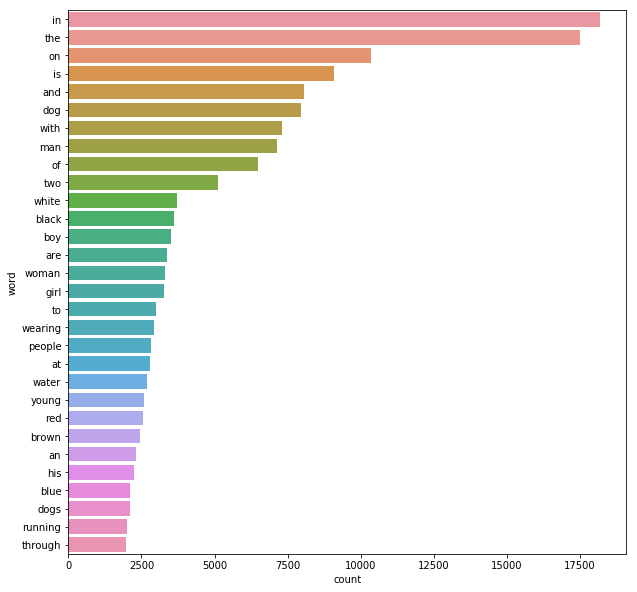

In [8]:
#Visualise the top 30 occuring words in the captions

df_top30=pd.DataFrame(val_count.items(),columns=['word','count'])
plt.figure(figsize=[10,10])
sns.barplot(y='word',x='count',data=df_top30.sort_values(by='count',ascending=False)[:30])
plt.show()

In [9]:
#Create a list which contains all the captions
annotations= df['Captions'].apply(lambda x: "<start> "+x+" <end>").tolist()#write your code here

#add the <start> & <end> token to all those captions as well

#Create a list which contains all the path to the images
all_img_path= df.Path.tolist() #write your code here

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_img_path)))

Total captions present in the dataset: 40455
Total images present in the dataset: 40455


## Pre-Processing the captions
1.Create the tokenized vectors by tokenizing the captions fore ex :split them using spaces & other filters. 
This gives us a vocabulary of all of the unique words in the data. Keep the total vocaublary to top 5,000 words for saving memory.

2.Replace all other words with the unknown token "UNK" .

3.Create word-to-index and index-to-word mappings.

4.Pad all sequences to be the same length as the longest one.

In [10]:
# create the tokenizer
from keras.preprocessing.text import Tokenizer
punctuations='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ '
unknown="<unk>"
tokenizer = Tokenizer(num_words=5000,oov_token=unknown,filters=punctuations)
tokenizer.fit_on_texts(annotations)
trainSeq = tokenizer.texts_to_sequences(annotations)
print(trainSeq[:5])

[[3, 2, 44, 5, 2, 89, 173, 8, 116, 52, 2, 389, 13, 385, 5, 29, 1, 670, 4], [3, 2, 20, 313, 64, 2, 197, 120, 4], [3, 2, 39, 20, 116, 64, 2, 197, 2368, 4], [3, 2, 39, 20, 116, 6, 385, 21, 63, 2368, 4], [3, 2, 39, 20, 5, 2, 89, 173, 313, 64, 2, 197, 2887, 4]]


In [11]:
# Create word-to-index and index-to-word mappings.
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'
trainSeq = tokenizer.texts_to_sequences(annotations)
wordToIndex=tokenizer.word_index
indexToWord=tokenizer.index_word

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


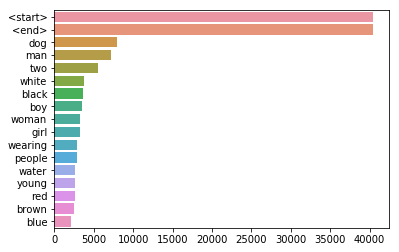

In [12]:
# Create a word count of your tokenizer to visulize the Top 30 occuring words after text processing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopWords=stopwords.words('english')
wordCount=sorted(tokenizer.word_counts.items(), key=lambda x:x[1],reverse=True)
word=[]
count=[]
for w,c in wordCount[:30]:
    if w.lower() not in stopWords:
        word.append(w)
        count.append(c)
sns.barplot(x=count,y=word)

In [13]:
# Pad each vector to the max_length of the captions ^ store it to a vairable

from keras.preprocessing.sequence import pad_sequences as padSeq

def getmaxlen(seq):
    max=len(seq[0])
    for i in seq:
        if len(i)>max:
            max=len(i)
    return max


max_len=getmaxlen(trainSeq)
cap_vector= padSeq(trainSeq,padding="post",maxlen=max_len)

print("The shape of Caption vector is :" + str(cap_vector.shape))


The shape of Caption vector is :(40455, 35)


## Pre-processing the images

1.Resize them into the shape of (299, 299)

3.Normalize the image within the range of -1 to 1, such that it is in correct format for InceptionV3. 

In [14]:
def PreProcessImage(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, (299, 299))
    image = preprocess_input(image)
    return image , image_path

## Create the train & test data 
1.Combine both images & captions to create the train & test dataset using tf.data.Dataset API. Create the train-test spliit using 80-20 ratio & random state = 42

2.Make sure you have done Shuffle and batch while building the dataset

3.The shape of each image in the dataset after building should be (batch_size, 299, 299, 3)

4.The shape of each caption in the dataset after building should be(batch_size, max_len)


In [15]:
from sklearn.model_selection import train_test_split
train_img,test_img,train_cap,test_cap=train_test_split(all_img_path,
                                                   cap_vector,
                                                   train_size=0.8,
                                                   random_state=42)

/mnt/disks/user/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [16]:
print("train image length : ",len(train_img))
print("test image length : ",len(test_cap))

train image length :  32364
test image length :  8091


## Load the pretrained Imagenet weights of Inception net V3

1.To save the memory(RAM) from getting exhausted, extract the features of thei mage using the last layer of pre-trained model. Including this as part of training will lead to higher computational time.

2.The shape of the output of this layer is 8x8x2048. 

3.Use a function to extract the features of each image in the train & test dataset such that the shape of each image should be (batch_size, 8*8, 2048)



In [17]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input #write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output #write code here to get the output of the image_model

image_features_extract_model = tf.keras.Model(new_input, hidden_layer)#build the final model using both input & output layer

In [18]:
BATCH_SIZE = 64
BUFFER_SIZE = 1000
features_shape = 2048
attention_features_shape = 64

In [19]:
# Get unique images
encode_train = sorted(set(df.Path.tolist()))
feature_dict={}
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
image_dataset = image_dataset.map(PreProcessImage, 
                                  num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)
print(image_dataset)

<BatchDataset shapes: ((None, 299, 299, 3), (None,)), types: (tf.float32, tf.string)>


In [20]:
# tqdm
for img, path in tqdm(image_dataset):
    batch_features = image_features_extract_model(img)
    batch_features = tf.reshape(batch_features,
                                (batch_features.shape[0], -1, batch_features.shape[3]))
  
    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        feature_dict[path_of_feature]=bf.numpy()

127it [15:37,  7.38s/it]


In [21]:
# write your code to extract features from each image in the dataset
def extractfeatures(img,cap):
    imgTensor=feature_dict[img.decode('utf-8')]
    return imgTensor,cap

train_dataset = tf.data.Dataset.from_tensor_slices((train_img, train_cap))
# Extracting features for Train Data set
train_dataset = train_dataset.map(lambda item1, item2: tf.numpy_function(
          extractfeatures, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((test_img, test_cap))

# Extracting features for Test Data set
test_dataset = test_dataset.map(lambda item1, item2: tf.numpy_function(
          extractfeatures, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

test_dataset = test_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


In [22]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) #(batch_size,40)

(64, 64, 2048)
(64, 35)


## Model Building
1.Set the parameters

2.Build the Encoder, Attention model & Decoder

In [23]:
embedding_dim = 256 
units = 512
vocab_size = 50001
train_num_steps = len(train_img) // BATCH_SIZE
test_num_steps = len(test_img) // BATCH_SIZE

### Encoder

In [ ]:
Model=tf.keras.Model
class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense =  tf.keras.layers.Dense(embedding_dim) #build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features)# extract the features from the image shape: (batch, 8*8, embed_dim)
        features = tf.nn.relu(features)
        return features

In [ ]:
encoder=Encoder(embedding_dim)

### Attention model

In [ ]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)#build your Dense layer
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1)#build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        #features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)
        hidden_with_time_axis =  tf.expand_dims(hidden, 1)# Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        hidden_layer = (tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis)))
        score =self.V(hidden_layer) # build your score funciton to shape: (batch_size, 8*8, units)
        attention_weights = tf.nn.softmax(score, axis=1) # extract your attention weights with shape: (batch_size, 8*8, 1)
        context_vector = attention_weights * features #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)# reduce the shape to (batch_size, embedding_dim)
        

        return context_vector, attention_weights

### Decoder

In [ ]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention =Attention_model(self.units) #iniitalise your Attention model with units
        self.embed =tf.keras.layers.Embedding(vocab_size, embedding_dim,mask_zero=True) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units)#build your Dense layer
        self.d2 =  tf.keras.layers.Dense(vocab_size)#build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden)#create your context vector & attention weights from attention model
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        mask=self.embed.compute_mask(x)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis=-1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed,mask=mask)# Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output,state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [ ]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [ ]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 50001)
Attention weights shape from Decoder: (64, 64, 1)


## Model training & optimization
1.Set the optimizer & loss object

2.Create your checkpoint path

3.Create your training & testing step functions

4.Create your loss function for the test dataset

In [ ]:
optimizer = tf.keras.optimizers.Adam() #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')#define your loss object

In [ ]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [ ]:
checkpoint_path = "./checkpoints/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [ ]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [ ]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        features = encoder(img_tensor)
        for index in range(1, target.shape[1]):
            pred, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, index], pred)
            dec_input = tf.expand_dims(target[:, index], 1)

    avg_loss = (loss / int(target.shape[1]))
    trainable_variables = encoder.trainable_variables + decoder.trainable_variables
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))
        
    return loss, avg_loss

In [ ]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    
    #write your code here to do the testing steps
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    features = encoder(img_tensor)
    for index in range(1, target.shape[1]):
        pred, hidden, _ = decoder(dec_input, features, hidden)
        loss += loss_function(target[:, i], pred)
        dec_input = tf.expand_dims(tf.argmax(pred, axis=1), 1)  
    avg_loss = (loss / int(target.shape[1]))
        
    return loss, avg_loss

In [ ]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset):
        batch_loss, t_loss = test_step(img_tensor, target)
        total_loss += t_loss
        avg_test_loss=total_loss / test_num_steps
    
    return avg_test_loss

In [ ]:
loss_plot = []
test_loss_plot = []
EPOCHS = 5

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
plt.plot(loss_plot)
plt.plot(test_loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

## Model Evaluation
1.Define your evaluation function using greedy search

2.Define your evaluation function using beam search ( optional)

3.Test it on a sample data using BLEU score

### Greedy Search

In [ ]:
max_length=maxPaddingLength
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(PreProcessImage(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input)# Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)# extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)# get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.random.categorical(predictions, 1)[0][0].numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions


### Beam Search(optional)

In [ ]:
def beam_evaluate(image, beam_index = #your value for beam index):

    #write your code to evaluate the result using beam search
                  
    return final_caption



In [ ]:
def plot_attmap(caption, weights, image):

    fig = plt.figure(figsize=(10, 10))
    temp_img = np.array(Image.open(image))
    
    len_cap = len(caption)
    for cap in range(len_cap):
        weights_img = np.reshape(weights[cap], (8,8))
        weights_img = np.array(Image.fromarray(weights_img).resize((224, 224), Image.LANCZOS))
        
        ax = fig.add_subplot(len_cap//2, len_cap//2, cap+1)
        ax.set_title(caption[cap], fontsize=15)
        
        img=ax.imshow(temp_img)
        
        ax.imshow(weights_img, cmap='gist_heat', alpha=0.6,extent=img.get_extent())
        ax.axis('off')
    plt.subplots_adjust(hspace=0.2, wspace=0.2)
    plt.show()

In [ ]:
from nltk.translate.bleu_score import sentence_bleu

In [ ]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [ ]:

rid = np.random.randint(0, len(testImg))
test_image = testImg[rid]
#test_image = './images/413231421_43833a11f5.jpg'
#real_caption = '<start> black dog is digging in the snow <end>'

real_caption = ' '.join([tokenizer.index_word[i] for i in testCap[rid] if i not in [0]])
result, attention_plot,pred_test = evaluate(test_image)


real_caption=filt_text(real_caption)      


pred_caption=' '.join(result).rsplit(' ', 1)[0]

real_appn = []
real_appn.append(real_caption.split())
reference = real_appn
candidate = pred_caption.split()

score = sentence_bleu(reference, candidate, weights=(0.5,0.5,0,0))#set your weights)
print(f"BELU score: {score*100}")

print ('Real Caption:', real_caption)
print ('Prediction Caption:', pred_caption)
plot_attmap(result, attention_plot, test_image)


ImagePIL.open(test_image)

In [ ]:
df[df.Path==test_image]['Captions']

## Text to Speech conversion

In [ ]:
from gtts import gTTS 
from playsound import playsound  
# This module is imported so that we can  
# play the converted audio 
import os 
def TextToSpeech(predcaption):

    # Passing the text and language to the engine,  
    # here we have marked slow=False. Which tells  
    # the module that the converted audio should  
    # have a high speed 
    myobj = gTTS(text=predcaption, lang='en', slow=False) 

    # Saving the converted audio in a mp3 file named 
    # welcome  
    file=predcaption+".mp3"
    myobj.save(file) 
    #Play sound
    playsound(file) 

In [ ]:
#Sound will played
TextToSpeech(pred_caption)